<a href="https://colab.research.google.com/github/anmitra/Text-Classification-using-Word-Embeddings/blob/master/News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem:***

From the beginning, since the first printed newspaper, every news that makes into a page has had a specific section allotted to it. Although pretty much everything changed in newspapers from the ink to the type of paper used, this proper categorization of news was carried over by generations and even to the digital versions of the newspaper. Newspaper articles are not limited to a few topics or subjects, it covers a wide range of interests from politics to sports to movies and so on. For long, this process of sectioning was done manually by people but now technology can do it without much effort. In this proble i have used Natural Language Processing to predict which genre or category a piece of news will fall in to from the story.

**Size of training set: 7,628 records**

**Size of test set: 2,748 records**

***FEATURES:***

STORY:  A part of the main content of the article to be published as a piece of news.

SECTION: The genre/category the STORY falls in.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows :

Politics: 0

Technology: 1

Entertainment: 2

Business: 3

In order to solve this problem i have employed these major steps:



1.   Clean and preprocess the data(Remove punctuations,Tokenize,Remove unwanted whitespaces,Remove unnecessary Whitespaces)

2.   After converting the text into sequence of numbers build a base Model(Multinomial Naive Bayes in this case).

3. Try out various sequential Models with word embeddings. Some of the Model architectures i tried are:


        a) Normal sequential NN using pre-trained 
           embedding weights from glove.
        
        b) Normal sequential NN with learnable embedding 
           weights(Not Pretrained).
        
        c) Tried Both the above after augmenting the data.
        
        d) LSTM(Long Short term Memory)



The above is a basic jist of what follow and i will explain in each section what i am trying to do and the rationale behind it.




In [226]:
#Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
print("Version: ", tf.__version__)

Version:  1.14.0


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Create the train and test dataset
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Data_Test.xlsx')

In [6]:
#Demo of the data
train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


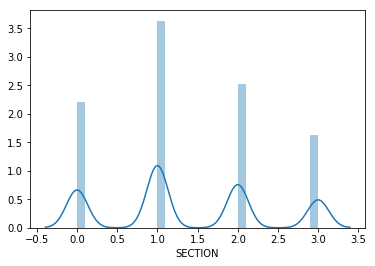

In [7]:
#Looking the distribution of different secrtions
sns.distplot(train['SECTION'])

I would like to look at a wordcloud in order to explore various words that are present in different categories and see if it makes sense or not

In [0]:
section = {
		0 : "Politics" ,
		1 : "Technology",
		2 : "Entertainment",
		3 : "Business",
	}

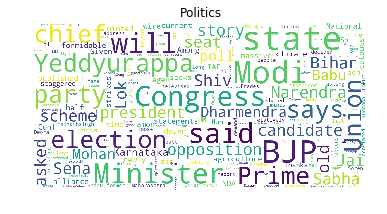

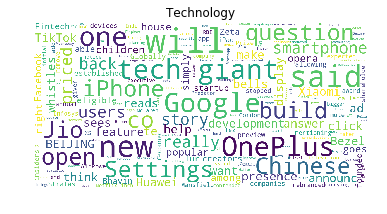

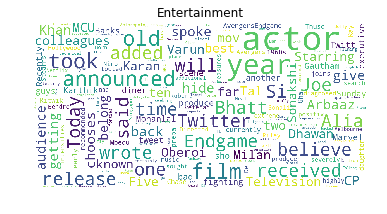

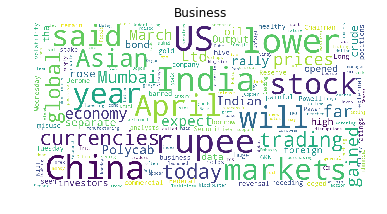

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None,):
    wordcloud = WordCloud(collocations=True,
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 10)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud

for i in section.keys():
  plt.title(section[i])
  show_wordcloud(train[train['SECTION']==i].STORY)

We do see above that the words that appear quite eveidently represent the respective categories 

Below, We quickly create a base Model(Naive Bayes), on which we will try and improve the model further.

It seems the test accuracy is pretty decent ~`96.9%`

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train['STORY'], labels, test_size=0.20, random_state=42)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions,average='weighted'))
print('Recall score: ', recall_score(y_test, predictions,average='weighted'))

Accuracy score:  0.9692005242463958
Precision score:  0.9695104902090261
Recall score:  0.9692005242463958


The next section is for defining the functions required for preprocessing the data.Most of the functions are self explanatory but i will mention some details wherever needed.

In [0]:
def lower(data):
  lower=[]
  for str in data:
    lower.append(str.lower())
  return lower

In [0]:
import re
def remove_numbers(data):
  clean_num=[]
  for str in data:
    clean_num.append(re.sub(r'\d+','', str))
  return clean_num

In [0]:
def remove_punctuation(data):
  clean_punc=[]

  for input_str in data:
    clean_punc.append(re.sub(r'[^\w\s]','',input_str))
  return clean_punc

In [0]:
def remove_whitespaces(data):
  clean_white=[]
  for input_str in data:
    clean_white.append(input_str.strip())
  return clean_white

In [0]:
def preprocess(data):
  clean=lower(data)
  clean=remove_numbers(clean)
  clean=remove_punctuation(clean)
  clean=remove_whitespaces(clean)
  
  return clean

In [0]:
clean=preprocess(train['STORY'])

In [22]:
clean[0]

'but the most painful was the huge reversal in fee income unheard of among private sector lenders essentially it means that yes bank took it for granted that fees on structured loan deals will be paid and accounted for upfront on its books as borrowers turned defaulters the fees tied to these loan deals fell off the cracks gill has now vowed to shift to a safer accounting practice of amortizing fee income rather than booking these upfront\n\n\ngills move to mend past ways means that there will be no nasty surprises in the future this is good news considering that investors love a clean image and loathe uncertainties\n\n\nbut there is no gain without pain and the promise of a strong and stable balance sheet comes with some sacrifices as well investors will have to give up the hopes of phenomenal growth a promise made by kapoor'

In [23]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [0]:
#Tokenize the sentence using the inbuilt function 'work_tokenize' from nltk

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize 
tokenized_sentence=[] 
example_sent = clean
  
stop_words = set(stopwords.words('english')) 
  
for sent in example_sent:
  word_tokens = word_tokenize(sent)
  tokenized_sentence.append(word_tokens)
 
 

In [28]:
tokenized_sentence[1]

['how',
 'formidable',
 'is',
 'the',
 'opposition',
 'alliance',
 'among',
 'congress',
 'jharkhand',
 'mukti',
 'morcha',
 'jmm',
 'and',
 'jharkhand',
 'vikas',
 'morcha',
 'prajatantrik']

In [0]:
#Removing stopwords(commonly occuring words in english that dont really add context to the text and can be discarded)

filtered_sent=[]
for sent in tokenized_sentence:
  filter=[]
  for word in sent:
    
    if word not in stop_words:
      filter.append(word)
  filtered_sent.append(filter)

In [34]:
filtered_sent[1]

['formidable',
 'opposition',
 'alliance',
 'among',
 'congress',
 'jharkhand',
 'mukti',
 'morcha',
 'jmm',
 'jharkhand',
 'vikas',
 'morcha',
 'prajatantrik']

Since i have used glove for creating the embedding matrix, we need to download the glove data and create the embedding matrix.

Essentially in a word embedding every word is represented by a multidimensional vector. In glove it is either 50,100,200,300.

I have used the 100d respresenation for my purpose essentially because it will be faster and higher dimensions might overfit the data i have 

In [35]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-10-02 12:21:35--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-10-02 12:21:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-10-02 12:21:35--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [37]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [38]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


Below is an example of a word that is represented in the word embedding

In [41]:
embeddings_index['opposition']

array([-0.83247 ,  0.69445 , -0.19285 , -0.34754 ,  0.57767 ,  0.84753 ,
       -0.62819 , -0.48971 , -0.019265,  0.04903 , -0.55055 ,  0.15503 ,
       -0.11374 , -0.12406 , -0.30871 , -0.062574, -0.54557 , -0.48779 ,
        0.026198,  0.018586,  0.8387  , -0.11668 ,  0.94518 , -0.25192 ,
       -0.42205 , -0.53005 , -0.034375, -0.27353 ,  0.9015  ,  0.25813 ,
        0.50222 ,  0.62168 ,  0.26052 ,  0.088959, -0.15677 , -0.13199 ,
        0.74353 , -0.062094, -0.71838 ,  0.12964 , -1.6796  , -0.075899,
        1.3249  , -0.19475 ,  0.22229 , -1.2539  , -0.096756, -0.13703 ,
       -0.24032 ,  0.25936 ,  0.3629  , -0.23196 ,  0.35993 ,  1.3492  ,
        0.2666  , -1.6969  , -0.092538,  0.25677 ,  1.538   ,  0.37521 ,
       -0.75587 , -1.0722  , -0.26114 ,  0.64    ,  1.031   ,  0.57182 ,
        0.25103 ,  0.080729, -0.018105,  0.013584,  0.48597 , -0.21661 ,
       -1.0783  , -1.0619  , -0.32891 ,  0.10062 , -0.14607 , -0.13679 ,
       -1.2819  ,  0.21692 ,  0.7883  , -0.43487 , 

In [0]:
#Create the labels
labels=[]
for i in train['SECTION']:
  labels.append(i)


In [0]:
#This is the usual splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filtered_sent, labels, test_size=0.20, random_state=42)

Since the algorithms take in sequence of numbers as input, we will need to convert our text data into one. I have done this using 'texts_to_sequences'.

Essentially in this process, every word is given a unique integer representation.

In [0]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

In [52]:
vocab_size

32345

Now, I have created the embedding matrix for our data using the word embeddings from glove

In [53]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

(32345, 100)


Since the algorithms require equal lengths for each sequence,we need to pad the sequences.

In [0]:
max_length = 105
padded_docs_train = pad_sequences(X_train, maxlen=max_length, padding='post')
padded_docs_test = pad_sequences(X_test, maxlen=max_length, padding='post')
#print(padded_docs)

The below just gives proportion of our total vocabulary that is represented by the embedding matrix

In [55]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.7573968155820064

Label Encoding the training and test labels

In [0]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
label_encode_train = np_utils.to_categorical(encoded_Y)

In [0]:
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
label_encode_test = np_utils.to_categorical(encoded_Y)

In [179]:
print(label_encode_train.shape)
print(label_encode_test.shape)

(6102, 4)
(1526, 4)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions,average='weighted'))
print('Recall score: ', recall_score(y_test, predictions,average='weighted'))

Accuracy score:  0.9692005242463958
Precision score:  0.9695104902090261
Recall score:  0.9692005242463958


In [0]:
#Function to plot accuracy and Loss for train and validation
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

I have used the input length to be 105 since that is the average length of the text data i have. We can choose to use the max length as well but i have chosen this as i believe this is a decent enough of representation length of the articles and also lesser training time

In [0]:
word_count=[]
for sent in tokenized_sentence:
  count=0
  for word in sent:
    count+=1
  word_count.append(count)

In [82]:
sum(word_count)/len(word_count)

105.10356581017305

I have used the pretrained weights for the data(embedding matrix) and chose not to train it as well. It performs decent.

Since this was a hackathon i had to predict on the test data and check the results by uploading my predictions.

You will notice that i have used a  'GlobalMaxPool1D' layer. This essentially picks up limited feautures(similar to what we do for CNN)

With this i was able to get ~90 % accuracy 

In [84]:
from keras.layers import Dropout
from keras import layers
model = Sequential()
e = Embedding(vocab_size, 100,weights=[embedding_matrix],input_length=105,trainable=False)
model.add(e)
model.add(layers.GlobalMaxPool1D())

model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# summarize the model
print(model.summary())

# fit the model
history=model.fit(padded_docs_train, label_encode_train, epochs=20,verbose=1,validation_data=(padded_docs_test,label_encode_test))
# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, label_encode, verbose=0)
#print('Accuracy: %f' % (accuracy*100))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 105, 100)          3234500   
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                3232      
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 3,237,864
Trainable params: 3,364
Non-trainable params: 3,234,500
_________________________________________________________________
None
Train on 6102 samples, validate on 1526 samples
Epoch 1/20
6102/6102 [==============================] - 1s 242us/step - loss: 1.2760 - acc: 0.6809 - val_loss: 0.9123 - val_acc: 0.8755
Epoch 2/20
6102/6102 [===========================

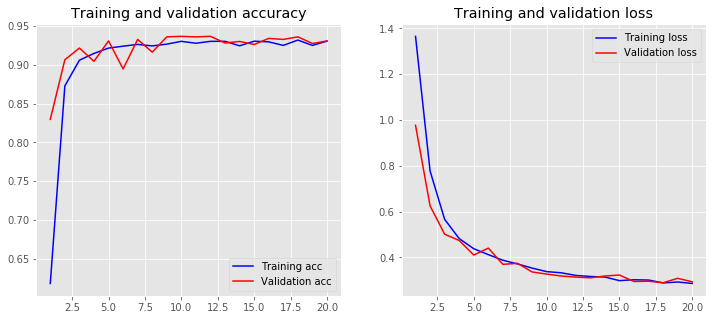

In [71]:
plot_history(history)

Use the embedding matrix but chose the trainable attribute as True.

This did improve the performance quite a bit and bumped it upto ~96%

In [90]:
from keras.layers import Dropout
from keras import layers
from keras.layers import Bidirectional
model = Sequential()
e = Embedding(vocab_size, 100,weights=[embedding_matrix],input_length=105,trainable=True)
model.add(e)
model.add(layers.GlobalMaxPool1D())
#model.add(Dense(32, activation='relu',kernel_regularizer='l2'))
#model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
history=model.fit(padded_docs_train, label_encode_train, epochs=20,verbose=1,validation_data=(padded_docs_test,label_encode_test))
# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, label_encode, verbose=0)
#print('Accuracy: %f' % (accuracy*100))

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 105, 100)          3234500   
_________________________________________________________________
global_max_pooling1d_14 (Glo (None, 100)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 404       
Total params: 3,234,904
Trainable params: 3,234,904
Non-trainable params: 0
_________________________________________________________________
None
Train on 6102 samples, validate on 1526 samples
Epoch 1/20
6102/6102 [==============================] - 10s 2ms/step - loss: 1.0047 - acc: 0.6411 - val_loss: 0.7579 - val_acc: 0.8362
Epoch 2/20
6102/6102 [==============================] - 9s 1ms/step - loss: 0.5919 - acc: 0.8791 - val_loss: 0.4817 - val_acc: 0.9030
Epoch 3/20
6102/6102 [=============================

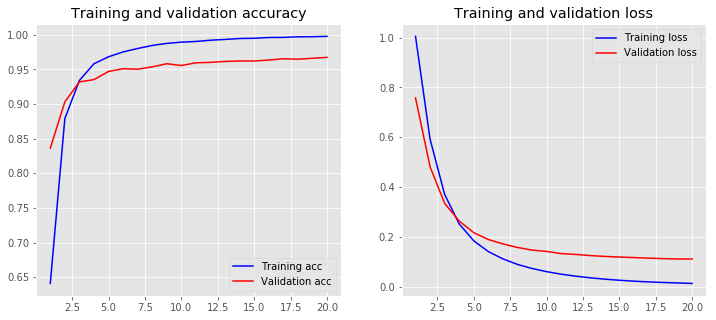

In [91]:
plot_history(history)

Then i said to myself, what if i try without the pretrained matrix and train a fresh embedding layer. 

Guess what this ended up giving me the best of the lot till now and the performance on the unknown data was ~97.1%

In [117]:
from keras.layers import Dropout
from keras import layers
from keras.layers import Bidirectional
model = Sequential()
e = Embedding(vocab_size, 100,input_length=105,trainable=True)
model.add(e)
model.add(layers.GlobalMaxPool1D())
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# summarize the model
print(model.summary())

# fit the model
history=model.fit(padded_docs_train, label_encode_train, epochs=20,verbose=1,validation_data=(padded_docs_test,label_encode_test))

# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, label_encode, verbose=0)
#print('Accuracy: %f' % (accuracy*100))

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 105, 100)          3234500   
_________________________________________________________________
global_max_pooling1d_21 (Glo (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 404       
Total params: 3,234,904
Trainable params: 3,234,904
Non-trainable params: 0
_________________________________________________________________
None
Train on 6102 samples, validate on 1526 samples
Epoch 1/20
6102/6102 [==============================] - 12s 2ms/step - loss: 1.1678 - acc: 0.4772 - val_loss: 0.8623 - val_acc: 0.7287
Epoch 2/20
6102/6102 [==============================] - 10s 2ms/step - loss: 0.5334 - acc: 0.9187 - val_loss: 0.3555 - val_acc: 0.9489
Epoch 3/20
6102/6102 [============================

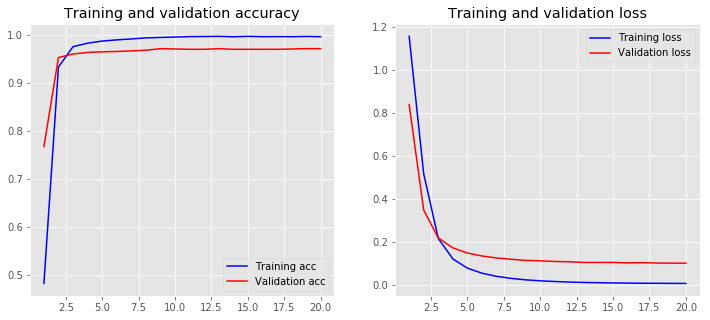

In [99]:
plot_history(history)

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

I tried a bunch of architectures by adding some dense layers,LSTM and training for more epochs but nothing seemed to improve the performance.

In the hackathon i was at 114th spot.

Then, i thought about using augmentation, since it did help me in one of my projects on image classification but as i was looking around, it seemed augmentation for text data is not that widely used.

Eventually, i came accross this blog where they had talked about using the 'para-phrase database' to replace words with their synonymns. I immediately latched onto it and below is an implementaion of the same.

In [0]:
def get_synonyms_lexicon(path):
    synonyms_lexicon = {}
    text_entries = [l.strip() for l in open(path).readlines()]
    for e in text_entries:
        e = e.split(' ')
        k = e[0]
        v = e[1:len(e)]
        synonyms_lexicon[k] = v
    return synonyms_lexicon

In [0]:
def synonym_replacement(sentence, synonyms_lexicon):
    keys = synonyms_lexicon.keys()
    words = word_tokenize(sentence)
    n_sentence = sentence
    for w in words:
        if w not in stop_words:
            if w in keys:
                n_sentence = n_sentence.replace(w, synonyms_lexicon[w][0])  # we replace with the first synonym
    return n_sentence

In [0]:
synonyms_lexicon = get_synonyms_lexicon('ppdb-xl.txt')

In [0]:
from nltk import word_tokenize
train_aug_story=[]
train_aug_label=[]
for sent,label in zip(clean,train.SECTION):
  train_aug_story.append(synonym_replacement(sent,synonyms_lexicon))
  train_aug_label.append(label)

In [148]:
print(train_aug_story[15])
print(clean[15])

this feature will help make the display more responsive that will inturn significantly up the game and ui experience it will also consume more battery but we expect this feature to have a alternation switch within the settings far love what is present in asus roger phone and razer phone
this feature will help make the display more responsive that will inturn significantly up the gaming and ui experience it will also consume more battery but we expect this feature to have a toggle switch within the settings much like what is present in asus rog phone and razer phone


The Augmented data is ready, Even though i was a bit skeptical about this since some of the sentences did not have any such word for which a synonymn could be found which means 'duplicate data' but i still went through with it

In [0]:
clean.extend(train_aug_story)
labels.extend(train_aug_label)

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize 
tokenized_sentence=[] 
example_sent = clean
  
stop_words = set(stopwords.words('english')) 
  
for sent in example_sent:
  word_tokens = word_tokenize(sent)
  tokenized_sentence.append(word_tokens)

filtered_sent=[]
for sent in tokenized_sentence:
  filter=[]
  for word in sent:
    if word not in stop_words:
      filter.append(word)
  filtered_sent.append(filter) 

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filtered_sent, labels, test_size=0.20, random_state=42)

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

In [157]:
# create a weight matrix for words in training docs
embedding_matrix_aug = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix_aug[i] = embedding_vector
print(embedding_matrix_aug.shape)

(39712, 100)


In [0]:
max_length = 105
padded_docs_train_aug = pad_sequences(X_train, maxlen=max_length, padding='post')
padded_docs_test_aug = pad_sequences(X_test, maxlen=max_length, padding='post')
#print(padded_docs)

In [0]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
label_encode_train = np_utils.to_categorical(encoded_Y)

encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
label_encode_test = np_utils.to_categorical(encoded_Y)

I followed the same process as before to feed the data into the model.

The results for train and validation below were amazing(~99%) but i was concerned about the 'test' data.

Voila, the accuracy on test data was 97.8% and my position on leaderboard jumped from 114 to 53. :)

I did try to look at a few more techniques using 'nlpaug' but didn't get enough time or was lazy enough to try implementing it. You can try it out.  

In [162]:
from keras.layers import Dropout
from keras import layers
model = Sequential()
e = Embedding(vocab_size, 100,input_length=105,trainable=True)
model.add(e)
model.add(layers.GlobalMaxPool1D())
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# summarize the model
print(model.summary())

# fit the model
history=model.fit(padded_docs_train_aug, label_encode_train, epochs=10,verbose=1,validation_data=(padded_docs_test_aug,label_encode_test))


# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, label_encode, verbose=0)
#print('Accuracy: %f' % (accuracy*100))

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 105, 100)          3971200   
_________________________________________________________________
global_max_pooling1d_24 (Glo (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 404       
Total params: 3,971,604
Trainable params: 3,971,604
Non-trainable params: 0
_________________________________________________________________
None
Train on 12204 samples, validate on 3052 samples
Epoch 1/10
12204/12204 [==============================] - 26s 2ms/step - loss: 0.8583 - acc: 0.6964 - val_loss: 0.3381 - val_acc: 0.9590
Epoch 2/10
12204/12204 [==============================] - 24s 2ms/step - loss: 0.1859 - acc: 0.9747 - val_loss: 0.1320 - val_acc: 0.9761
Epoch 3/10
12204/12204 [=====================

Next, I wanted to venture into RNNs since they are pretty slick with sequential data. but they usually need a lot of data.

I added a few LSTM layers and i was able to get around 99% accuracy on validation in just 8 epochs.

LSTM(Long Short term Memory): I am not going to try and explain it here but basically it is a pretty cool algorithm that uses memory cells to store longer sequences of data(This is a highly simplified description)

In [228]:
from keras.layers import LSTM
from keras.layers import Dropout
from keras import layers
from keras.layers import Bidirectional
model = Sequential()
e = Embedding(vocab_size, 100,input_length=105,trainable=True)
model.add(e)
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# summarize the model
print(model.summary())

# fit the model
history=model.fit(padded_docs_train_aug, label_encode_train, epochs=8,verbose=1,validation_data=(padded_docs_test_aug,label_encode_test))

# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, label_encode, verbose=0)
#print('Accuracy: %f' % (accuracy*100))

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 105, 100)          3971200   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 105, 128)          84480     
_________________________________________________________________
dropout_31 (Dropout)         (None, 105, 128)          0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 4)                 260       
Total params: 4,097,156
Trainable params: 4,097,156
Non-trainable params: 0
___________________________________________

Conclusion:

The final test accuracy that i was able to achieve before time ran out and i went on to solving something new was ~97.9% and my rank ended at 53.

While solving this problem i got experience in handling sequestial text data and applying state of the art sequential algorithms and got pretty decent results as well.

Some things i would i like to try:

1) create some weighted features TF-IDF and use them as embedding weights.

2) Use some more RNN architectures like GRU(Gated Recurrent Unit)

In [0]:
#This is how to predict on unknown data.Just in case. 'filtered_sent_predict' is created the same way filtered_sent was created above
Pred=tokenizer.texts_to_sequences(filtered_sent_predict)
padded_docs_predict = pad_sequences(Pred, maxlen=max_length, padding='post')

In [0]:
predictions=model.predict(padded_docs_predict)

In [0]:
prediction_final=[]
for i in predictions:
  prediction_final.append(np.argmax(i))

In [0]:
model_embed.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())
# fit the model
history=model_embed.fit(padded_docs_train, label_encode_train, epochs=30, verbose=1,validation_data=(padded_docs_test,label_encode_test))

In [0]:
#Saving the output in order to check the results
pd.DataFrame(prediction_final).to_excel('output.xlsx', header=False, index=False)